In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("logistic_regression.csv")

In [3]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Problem Statement
## Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [7]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [10]:
missing_values_table(df)

,Missing Values,% of Total Values
mort_acc,37795,9.5
emp_title,22927,5.8
emp_length,18301,4.6
title,1755,0.4
pub_rec_bankruptcies,535,0.1
revol_util,276,0.1


In [11]:
# missing values are low for title , pub_rec_bankruptcies i will drop them 
df = df.drop(columns = 'revol_util', axis=1)
df = df.drop(columns = 'title', axis=1)
df = df.drop(columns = 'pub_rec_bankruptcies', axis=1)

In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc', 'address'],
      dtype='object')

In [13]:
missing_values_table(df)

,Missing Values,% of Total Values
mort_acc,37795,9.5
emp_title,22927,5.8
emp_length,18301,4.6


d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

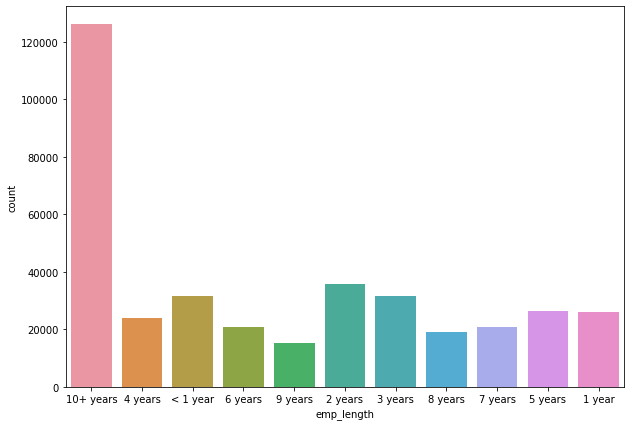

In [14]:
df['emp_length'].value_counts()
plt.figure(figsize = (10,7))
sns.countplot(df['emp_length'])

In [15]:
# Handled msising value with  mode for emp_length
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])

In [16]:
missing_values_table(df)

,Missing Values,% of Total Values
mort_acc,37795,9.5
emp_title,22927,5.8


d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

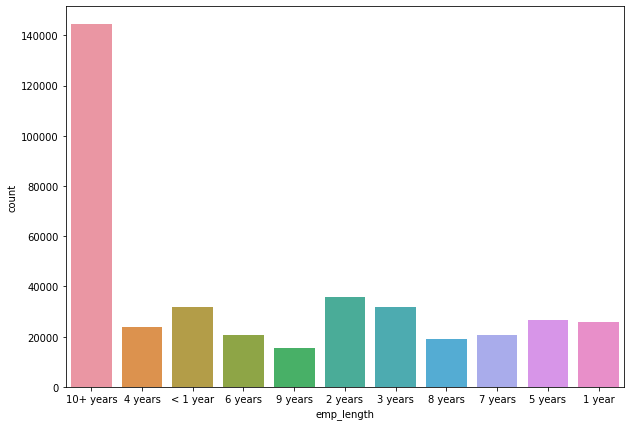

In [17]:
plt.figure(figsize = (10,7))
sns.countplot(df['emp_length'])
#dustribution is almost the same

In [18]:

df['emp_length']=df['emp_length'].str.extract(r"(\d+)") # using reg.exp to capture one or more digits
df['emp_length'] =df['emp_length'].astype(float)
df['emp_length'].value_counts()

10.0    144342
1.0      57607
2.0      35827
3.0      31665
5.0      26495
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: emp_length, dtype: int64

In [19]:
missing_values_table(df)

,Missing Values,% of Total Values
mort_acc,37795,9.5
emp_title,22927,5.8


In [20]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

d:\testautomation\python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mort_acc', ylabel='Density'>

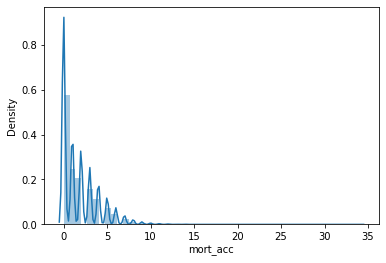

In [21]:
sns.distplot(df['mort_acc'])

In [22]:
df['mort_acc'].fillna(df['mort_acc'].median(),inplace= True)

In [23]:
missing_values_table(df)

,Missing Values,% of Total Values
emp_title,22927,5.8


In [24]:
df['emp_title'].fillna('other',inplace=True)

In [25]:
df['term']=df['term'].apply(lambda x : x.split()[0])
df['address']=df['address'].apply(lambda x : x.split(" ")[-1])

In [26]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,1.0,RENT,43057.0,...,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,...,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,...,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2.0,RENT,40000.0,...,15.63,Nov-2004,6.0,0.0,1990.0,23.0,w,INDIVIDUAL,0.0,30723
396026,21000.0,36,12.29,700.42,C,C1,Agent,5.0,MORTGAGE,110000.0,...,21.45,Feb-2006,6.0,0.0,43263.0,8.0,f,INDIVIDUAL,1.0,05113
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10.0,RENT,56500.0,...,17.56,Mar-1997,15.0,0.0,32704.0,23.0,f,INDIVIDUAL,0.0,70466
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10.0,MORTGAGE,64000.0,...,15.88,Nov-1990,9.0,0.0,15704.0,20.0,f,INDIVIDUAL,5.0,29597


# Visualising categorical features

In [27]:
cat_data=df.select_dtypes(exclude=np.number)
cat_data

,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36,B,B4,Marketing,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,22690
1,36,B,B5,Credit analyst,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,05113
2,36,B,B3,Statistician,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,05113
3,36,A,A2,Client Advocate,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,00813
4,60,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60,B,B4,licensed bankere,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,30723
396026,36,C,C1,Agent,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,05113
396027,36,B,B1,City Carrier,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,70466
396028,60,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,29597


Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


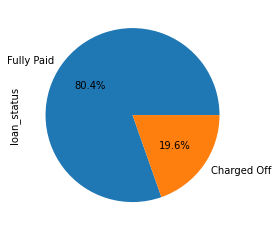

In [28]:
df['loan_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df['loan_status'].value_counts())

In [29]:
Ratio_loan_ststus = df['loan_status'].value_counts()[0] / df['loan_status'].value_counts()[1]


In [30]:
Ratio_loan_ststus

4.098682940017767

In [31]:
# years in current job

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

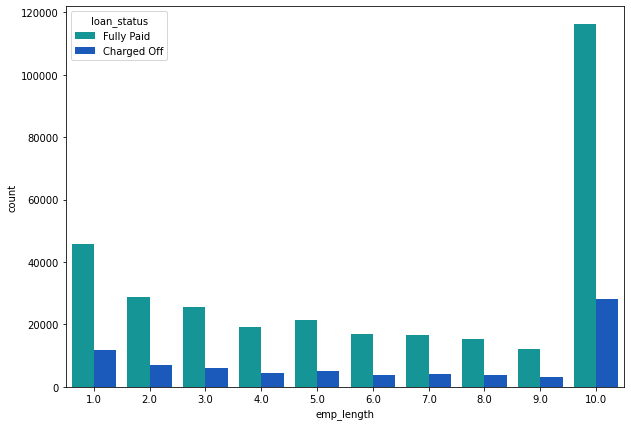

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(df['emp_length'],hue=df['loan_status'],palette='winter_r')


In [33]:
# loan status is fully charged in case of people have 10+ years in thier current job

In [34]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

<AxesSubplot:xlabel='count', ylabel='purpose'>

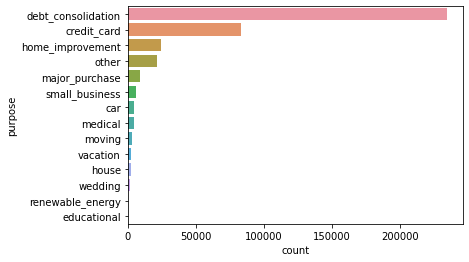

In [35]:
sns.countplot(y='purpose' , data=df, order = df['purpose'].value_counts().index)

In [36]:
# majority loan  has Taken for Debt_consolidation,creditcard,homeimproevemnrt 

In [37]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='count', ylabel='home_ownership'>

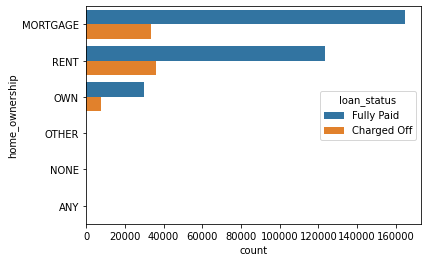

In [38]:
sns.countplot(y='home_ownership',data=df,order=df['home_ownership'].value_counts().index,hue='loan_status')

36    302005
60     94025
Name: term, dtype: int64

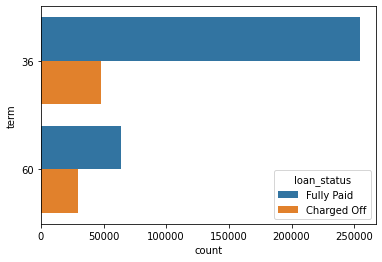

In [39]:
sns.countplot(y='term',data=df,order=df['term'].value_counts().index,hue='loan_status')
df['term'].value_counts()

In [40]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='application_type'>

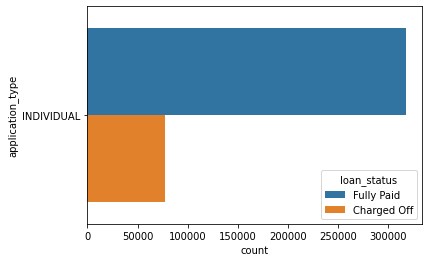

In [41]:
sns.countplot(data=df,y=df[df['application_type']=='INDIVIDUAL'].application_type,hue='loan_status')


<AxesSubplot:xlabel='count', ylabel='application_type'>

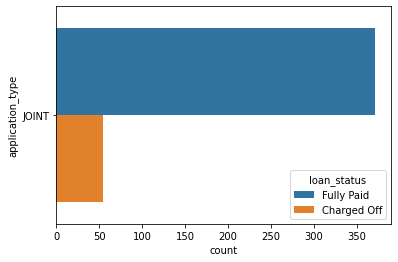

In [42]:
sns.countplot(data=df,y=df[df['application_type']=='JOINT'].application_type,hue='loan_status')


<AxesSubplot:xlabel='count', ylabel='application_type'>

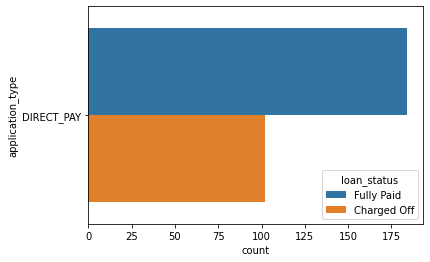

In [43]:
sns.countplot(data=df,y=df[df['application_type']=='DIRECT_PAY'].application_type,hue='loan_status')

In [44]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,1.0,RENT,43057.0,...,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,...,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,...,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2.0,RENT,40000.0,...,15.63,Nov-2004,6.0,0.0,1990.0,23.0,w,INDIVIDUAL,0.0,30723
396026,21000.0,36,12.29,700.42,C,C1,Agent,5.0,MORTGAGE,110000.0,...,21.45,Feb-2006,6.0,0.0,43263.0,8.0,f,INDIVIDUAL,1.0,05113
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10.0,RENT,56500.0,...,17.56,Mar-1997,15.0,0.0,32704.0,23.0,f,INDIVIDUAL,0.0,70466
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10.0,MORTGAGE,64000.0,...,15.88,Nov-1990,9.0,0.0,15704.0,20.0,f,INDIVIDUAL,5.0,29597


<AxesSubplot:>

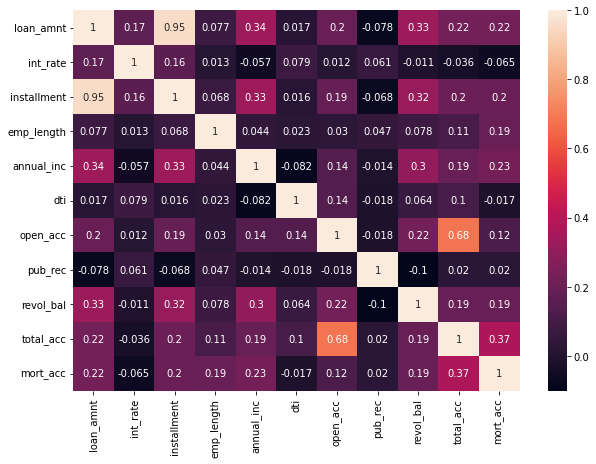

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot= True)

<AxesSubplot:xlabel='count', ylabel='address'>

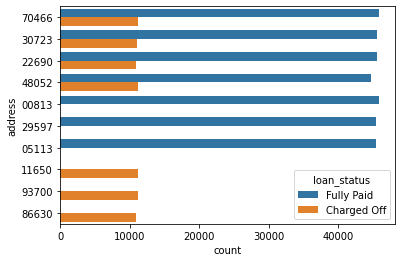

In [46]:
sns.countplot(y='address',data=df,order=df['address'].value_counts().index,hue='loan_status')

In [47]:
#What percentage of customers have fully paid their Loan Amount?->Ans=0.80

per_cus_fully_paid=len(df[df['loan_status']=='Fully Paid'].loan_status)/len(df['loan_status'])
per_cus_fully_paid



0.8038709188697826

In [48]:
#Comment about the correlation between Loan Amount and Installment features.
# df.columns


<AxesSubplot:xlabel='grade', ylabel='count'>

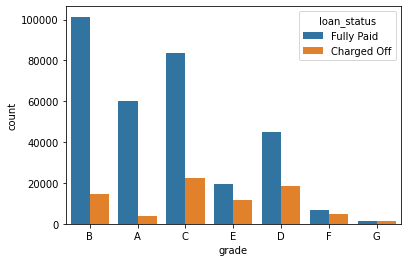

In [49]:
sns.countplot(data=df,x=df['grade'],hue=df['loan_status'])


# Encoding

In [50]:
cat_data = ['loan_status','home_ownership','purpose','grade','initial_list_status','application_type','verification_status','term']

In [51]:
from sklearn import preprocessing
le = LabelEncoder()

In [52]:
for col in cat_data:
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

['Charged Off' 'Fully Paid']
['ANY' 'MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']
['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['f' 'w']
['DIRECT_PAY' 'INDIVIDUAL' 'JOINT']
['Not Verified' 'Source Verified' 'Verified']
['36' '60']


In [53]:
df['emp_title'].value_counts()

other                      22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Services, Inc           1
Name: emp_title, Length: 173106, dtype: int64

In [54]:
df.drop(columns=['earliest_cr_line','emp_title','earliest_cr_line'],inplace=True,axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address'],
      dtype='object')

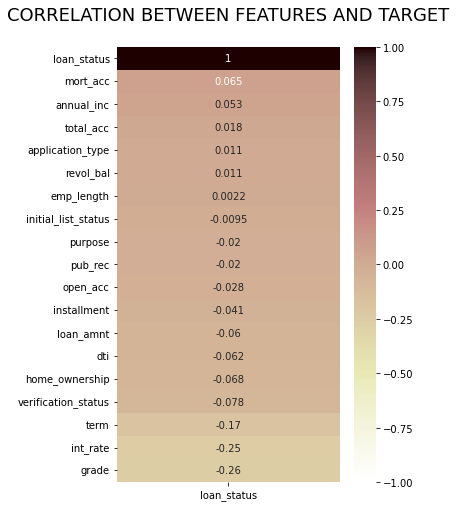

In [55]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(df.corr()[['loan_status']].sort_values(
    by='loan_status',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET\n', loc='center', fontsize=18);
plt.show()

<AxesSubplot:xlabel='count', ylabel='total_acc'>

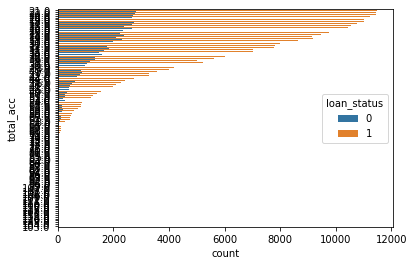

In [56]:
sns.countplot(y='total_acc',data=df,order=df['total_acc'].value_counts().index,hue='loan_status')

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

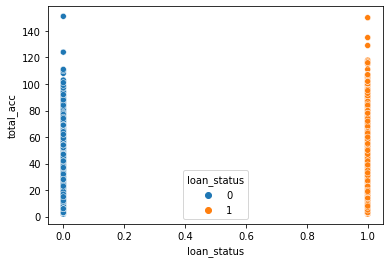

In [57]:
sns.scatterplot(y=df['total_acc'],x=df['loan_status'],data=df,hue='loan_status')

In [58]:
list(df.columns)

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'address']

# outliers

In [59]:

df.drop('address',inplace=True,axis=1)



num_col=list(df.columns)


In [60]:
df.drop('sub_grade',inplace=True,axis=1)

In [61]:
df.drop('issue_d',inplace=True,axis=1)

In [62]:
num_col=list(df.columns)
def cut(df,feature):
        q1 = df[feature].quantile(.25)
        q3 = df[feature].quantile(.75)
        iqr = q3 - q1
        upper_bound_nmmarried=q3+(1.5*iqr)
        
        lower_bound_nmarried=q1-(1.5*iqr)
        df1=df[df[feature]>lower_bound_nmarried]
        df1=df[df[feature]<upper_bound_nmmarried]
        return df1
df_without= df.copy()

for i in num_col:
    print(i)
    op = cut(df_without,i)

loan_amnt
term
int_rate
installment
grade
emp_length
home_ownership
annual_inc
verification_status
loan_status
purpose
dti
open_acc
pub_rec
revol_bal
total_acc
initial_list_status
application_type
mort_acc


# check VIF

In [63]:
#Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>10) (10 Points)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

,Features,VIF
0,loan_amnt,225.18
3,installment,202.08
2,int_rate,112.83
17,application_type,58.78
4,grade,31.02
15,total_acc,12.36
12,open_acc,11.80
1,term,8.64
9,loan_status,5.46
6,home_ownership,4.48


# Drop col having VIF > 10

In [64]:
col_to_drop=['loan_amnt']
for i in col_to_drop:
    op.drop(i,axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

d:\testautomation\python3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Features,VIF
1,int_rate,107.50
16,application_type,56.20
3,grade,30.98
14,total_acc,12.36
11,open_acc,11.80
2,installment,5.51
8,loan_status,5.46
5,home_ownership,4.48
4,emp_length,4.32
6,annual_inc,3.05


In [65]:
# col_to_drop=['loan_amnt','installment','int_rate','term','application_type','grade','total_acc']
# for i in col_to_drop:
#     op.drop(i,axis=1,inplace=True)

In [66]:
col_to_drop=['int_rate']
for i in col_to_drop:
    op.drop(i,axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

d:\testautomation\python3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Features,VIF
15,application_type,27.36
13,total_acc,12.36
10,open_acc,11.80
1,installment,5.49
7,loan_status,5.46
4,home_ownership,4.47
3,emp_length,4.32
2,grade,4.21
5,annual_inc,3.05
6,verification_status,3.01


In [67]:
col_to_drop=['application_type']
for i in col_to_drop:
    op.drop(i,axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

d:\testautomation\python3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Features,VIF
13,total_acc,12.28
10,open_acc,11.25
1,installment,5.30
7,loan_status,4.24
2,grade,4.03
3,emp_length,3.87
4,home_ownership,3.37
5,annual_inc,3.02
6,verification_status,2.99
15,mort_acc,2.72


In [68]:
col_to_drop=['total_acc']
for i in col_to_drop:
    op.drop(i,axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

d:\testautomation\python3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Features,VIF
10,open_acc,5.54
1,installment,5.29
7,loan_status,4.21
2,grade,4.02
3,emp_length,3.85
4,home_ownership,3.35
5,annual_inc,3.01
6,verification_status,2.99
14,mort_acc,2.42
8,purpose,2.24


In [69]:
op

,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,initial_list_status,mort_acc
0,0,329.48,1,10.0,5,117000.0,0,1,12,26.24,16.0,0.0,36369.0,1,0.0
1,0,265.68,1,4.0,1,65000.0,0,1,2,22.05,17.0,0.0,20131.0,0,3.0
2,0,506.97,1,1.0,5,43057.0,1,1,1,12.79,13.0,0.0,11987.0,0,0.0
3,0,220.65,0,6.0,5,54000.0,0,1,1,2.60,6.0,0.0,5472.0,0,0.0
4,1,609.33,2,9.0,1,55000.0,2,0,1,33.95,13.0,0.0,24584.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,217.38,1,2.0,5,40000.0,1,1,2,15.63,6.0,0.0,1990.0,1,0.0
396026,0,700.42,2,5.0,1,110000.0,1,1,2,21.45,6.0,0.0,43263.0,0,1.0
396027,0,161.32,1,10.0,5,56500.0,2,1,2,17.56,15.0,0.0,32704.0,0,0.0
396028,1,503.02,2,10.0,1,64000.0,2,1,2,15.88,9.0,0.0,15704.0,0,5.0


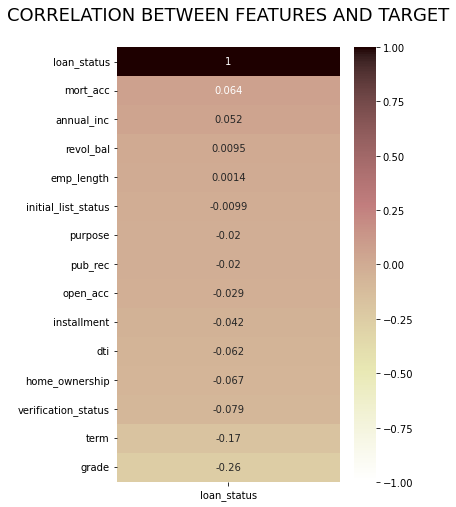

In [70]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(op.corr()[['loan_status']].sort_values(
    by='loan_status',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET\n', loc='center', fontsize=18);
plt.show()

In [71]:
x = op.drop(['loan_status'], axis=1).values
y = op['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state= 42)


# Logistic Regression

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(x_train , y_train)
print(lr.score(x_train , y_train))
print(lr.score(x_test , y_test))


0.804007721238867
0.8029111744906087


In [73]:
y_pred = lr.predict(x_test)
y_pred
data3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data3.head(10)

,Y_test,Y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


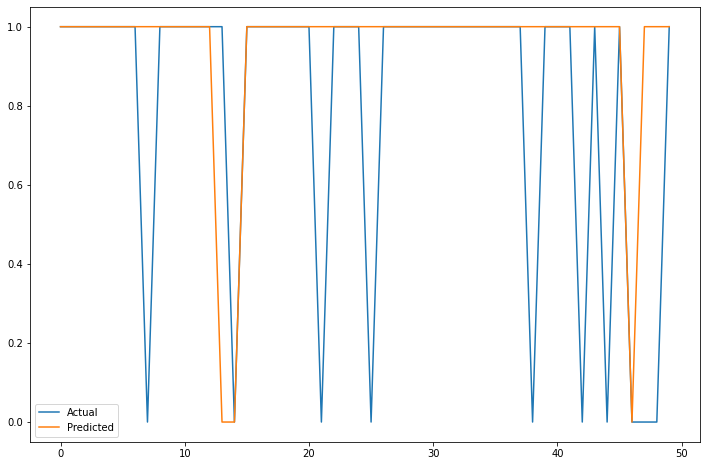

In [74]:
plt.figure(figsize=(12,8))
plt.plot(data3[:50])
plt.legend([ 'Actual' ,'Predicted'])

In [75]:
 from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [76]:

f1=f1_score(y_test, y_pred, average='weighted') 
f1

0.7499409514125484

In [77]:
recall=recall_score(y_test, y_pred, average='weighted')
recall

0.8029111744906087

In [78]:

preciosn=precision_score(y_test, y_pred, average='weighted')
preciosn

0.7547955343174783

In [79]:
conf_mat1 = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat1

array([[ 1776, 13562],
       [ 1779, 60721]], dtype=int64)

In [80]:
conf_mat1

array([[ 1776, 13562],
       [ 1779, 60721]], dtype=int64)

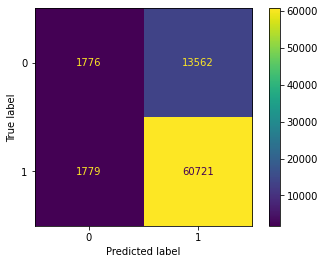

In [81]:
ConfusionMatrixDisplay(conf_mat1).plot()

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,y_pred)
roc_auc

0.5436634231320903

# analysis with balanced data

In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(x_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({1: 249935, 0: 249935})


In [85]:
X_sm.shape

(499870, 14)

In [86]:
y_sm.shape

(499870,)

In [87]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sm,y_sm, test_size=0.2,random_state= 42)

In [88]:
lr.fit(X_train1 , y_train1)
print(lr.score(X_train1 , y_train1))
print(lr.score(X_test1 , y_test1))

0.6522245783903815
0.6491087682797527


In [89]:
y_pred1 = lr.predict(X_test1)

In [90]:
conf_mat2 = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
conf_mat2

array([[31679, 18547],
       [16533, 33215]], dtype=int64)

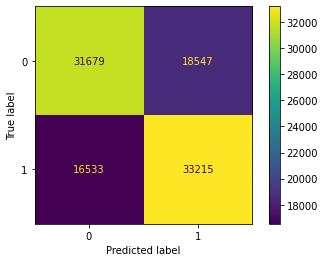

In [91]:
ConfusionMatrixDisplay(conf_mat2).plot()

In [92]:
recall=recall_score(y_test1, y_pred1, average='weighted')
recall

0.6491087682797527

In [93]:
preciosn=precision_score(y_test1, y_pred1, average='weighted')
preciosn

0.6494188059955517

# Tradeoff Questions:


# Ans =when working with imbalanced data and some use cases should prioritize precision while others should prioritize recall, there is no universal right or wrong answer.


## How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it



### Ans= we can use preciosn here it will reduce the risk of defaulters with imbalansed data 


## Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)

### In this Case we can use recall here it will reduce the risk of defaulters with imbalansed data 

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(op.corr(), annot= True)